## Notebook to study effects of various dynamics parameter on Dipolar interaction static spectrum

In [1]:
import numpy as np

# the results folder path
results_folder = "/Users/yunyao_1/Dropbox/KcsA/analysis/analysis_notebooks/results"

# scan through all npy files and load them into a numpy array


import os

def load_npy_results(folder="results"):
    """
    Load all .npy files in a folder into a dictionary.

    Parameters
    ----------
    folder : str
        Path to the folder containing .npy files.

    Returns
    -------
    data_dict : dict
        Dictionary where keys are filenames (without extension)
        and values are loaded numpy arrays.
    """
    data_dict = {}
    for fname in os.listdir(folder):
        if fname.endswith(".npy"):
            key = os.path.splitext(fname)[0]  # remove .npy extension
            fpath = os.path.join(folder, fname)
            data_dict[key] = np.load(fpath, allow_pickle=True)
    return data_dict


data_dict = load_npy_results(results_folder)

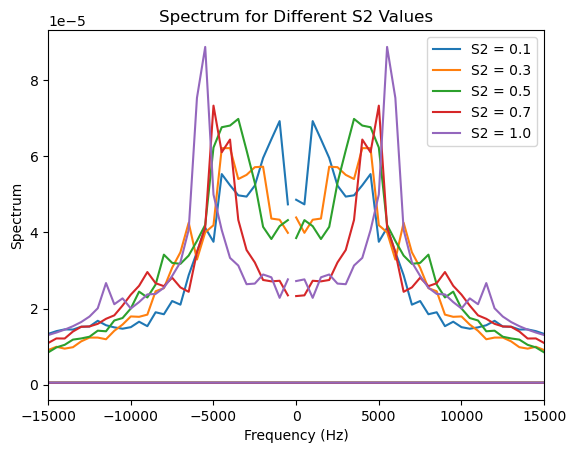

In [2]:
# plot the results for different s2
# x is freq y is the spectrum

import matplotlib.pyplot as plt

S2_values=[0.1, 0.3, 0.5, 0.7, 1.0] # example s2 values

for s2 in S2_values:
    if f"S2_{s2}_freq" in data_dict and f"S2_{s2}_fft" in data_dict:
        plt.plot(data_dict[f"S2_{s2}_freq"], np.abs(data_dict[f"S2_{s2}_fft"]), label=f"S2 = {s2}")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.xlim(-15000, 15000)
plt.title("Spectrum for Different S2 Values")
plt.legend()
plt.show()